## The Sparks Foundation >>>>>> Task4 <<<<<<

## By Satish Kumar Pal Global Terrorism

## Data Preprocessing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

## Load dataset

In [2]:
df = pd.read_csv("C:\\Users\\Satish Kumar Pal\\Desktop\\project playground\\The sparks Foundation\\Task 4\\globalterrorismdb_0718dist.csv",encoding='latin1')
df

C:\Users\Satish Kumar Pal\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df.shape

(181691, 135)

In [5]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [6]:
df.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region                  region_txt  \
181686      182      Somalia      11          Sub-Saharan Africa   
181687      200        Syria      10  Middle East & North Africa   
181688      160  Philippines       5              Southeast Asia   
181689       92        India       6                  South Asia   
181690      160  Philippines       5              Southeast Asia   

              provstate           city   latitude   longitude  specificity  \
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034          2.0   
181687         Lattakia         Jableh  35.407278   35.942679          1.0   
181688      Maguindanao       Kubentog   6.900742  124.437908          2.0   
181689          Manipur         Imphal  24.798346   93.940430          1.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966          1.0   

        vicinity                                           location  \
181686         0     The incident occurred near the town of Balcad.   
181687         1     The incident occurred at the Humaymim Airport.   
181688         0  The incident occurred in the Datu Hoffer distr...   
181689         0  The incident occurred in the Mantripukhri neig...   
181690         0                                                NaN   

                                                  summary  crit1  crit2  \
181686  12/31/2017: Assailants opened fire on a Somali...      1      1   
181687  12/31/2017: Assailants launched mortars at the...      1      1   
181688  12/31/2017: Assailants set fire to houses in K...      1      1   
181689  12/31/2017: Assailants threw a grenade at a Fo...      1      1   
181690  12/31/2017: An explosive device was discovered...      1      1   

        crit3  doubtterr  alternative             alternative_txt  multiple  \
181686      0        1.0          1.0  Insurgency/Guerilla Action       0.0   
181687      0        1.0          1.0  Insurgency/Guerilla Action       0.0   
181688      1        0.0          NaN                         NaN       0.0   
181689      1        0.0          NaN                         NaN       0.0   
181690      1        0.0          NaN                         NaN       0.0   

        success  suicide  attacktype1                 attacktype1_txt  \
181686        1        0            2                   Armed Assault   
181687        1        0            3               Bombing/Explosion   
181688        1        0            7  Facility/Infrastructure Attack   
181689        0        0            3               Bombing/Explosion   
181690        0        0            3               Bombing/Explosion   

        attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
181686          NaN             NaN          NaN             NaN          4   
181687          NaN             NaN          NaN             NaN          4   
181688          NaN             NaN          NaN             NaN         14   
181689          NaN             NaN          NaN             NaN          2   
181690          NaN             NaN          NaN             NaN         20   

                      targtype1_txt  targsubtype1  \
181686                     Military          36.0   
181687                     Military          27.0   
181688  Private Citizens & Property          76.0   
181689         Government (General)          21.0   
181690                      Unknown           NaN   

                                     targsubtype1_txt  \
181686                       

## Exploratory Data Analysis

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

In [11]:
#sns.pairplot(df)
#plt.show()

In [12]:
# Value count of each Features
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("------------------------------")

In [13]:
value_count(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 33.303566    7521
 24.891115    2686
-11.967368    2401
 36.354145    2247
 54.607712    2189
-33.366238    1562
 13.692880    1559
 2.059819     1536
 41.106178    1052
 37.997490    1017
 4.667128      990
 33.888523     914
 35.452110     907
 6.242026      857
 14.622869     849
 32.069286     831
 30.200819     793
 34.006004     787
 34.516895     735
 33.743240     719
 34.083740     646
 48.856644     607
 33.349159     562
 23.791275     560
 41.890961     553
 31.126646     513
 33.420948     491
 31.771599     484
 36.201721     475
 15.325443     466
 40.697132     460
-34.617680     458
 14.596051     454
 24.798346     440
 11.840929     438
-13.152712     419
 40.465595     419
 51.504387     413
 55.011562     394
 34.621521     393
 36.763763     387
 31.502407     378
 33.515244     352
 43.258434     332
 33.310650     319
 41.918891     318
 31.631083     317
 43.291618     313
 3.429344      313
 41.930607     307
 39.930771     292
 6.941837      287
 12.825647  

 4.437177e+01    7521
 6.714331e+01    2686
-7.697846e+01    2401
 4.314357e+01    2247
-5.956210e+00    2189
-7.050530e+01    1562
-8.919916e+01    1559
 4.532612e+01    1536
 2.868986e+01    1052
 2.376273e+01    1017
-7.410606e+01     990
 3.550351e+01     914
 4.437547e+01     907
-7.556477e+01     857
-9.052907e+01     849
 2.015114e+01     831
 6.699435e+01     793
 7.153743e+01     787
 6.914701e+01     735
 4.462382e+01     719
 7.478990e+01     646
 2.342330e+00     607
 4.378420e+01     562
 9.041821e+01     560
 1.249007e+01     553
 3.380087e+01     513
 4.329566e+01     491
 3.520340e+01     484
 3.714352e+01     475
 4.421189e+01     466
-7.393135e+01     460
-5.844443e+01     458
 1.209787e+02     454
 9.394043e+01     440
 1.314146e+01     438
-7.421863e+01     419
-3.696263e+00     419
-1.400410e-01     413
-7.312045e+00     394
 4.366838e+01     393
 3.055413e+00     387
 3.445974e+01     378
 3.629208e+01     352
-2.921819e+00     332
 4.403821e+01     319
 8.737554e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1    179607
0      2084
Name: crit1, dtype: int64
------------------------------
1    180436
0      1255
Name: crit2, dtype: int64
------------------------------
1    159101
0     22590
Name: crit3, dtype: int64
------------------------------
 0.0    138905
 1.0     29001
-9.0     13784
Name: doubtterr, dtype: int64
------------------------------
1.0    23410
2.0     3665
3.0     1296
5.0      321
4.0      319
Name: alternative, dtype: int64
------------------------------
Insurgency/Guerilla Action    23410
Other Crime Type               3665
Intra/Inter-group Conflict     1296
State Actors                    321
Lack of Intentionality          319
Name: alternative_txt, dtype: int64
------------------------------
0.0    156658
1.0     25032
Name: multiple, dtype: int64
------------------------------
1    161632
0     20059
Name: success, dtype: int64
------------------------------
0    175058
1      6633
Name: suicide, dtype: int64
------------------------------
3    88255
2    42669


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Civilians                                                                                                                                                                    2376
Soldiers                                                                                                                                                                      297
Civilian                                                                                                                                                                      273
Members                                                                                                                                                                       257
Officers                                                                                                                                                                      196
Unknown                                                                                                       

Unknown                                                                                                             82782
Taliban                                                                                                              7478
Islamic State of Iraq and the Levant (ISIL)                                                                          5613
Shining Path (SL)                                                                                                    4555
Farabundo Marti National Liberation Front (FMLN)                                                                     3351
Al-Shabaab                                                                                                           3288
New People's Army (NPA)                                                                                              2772
Irish Republican Army (IRA)                                                                                          2671
Revolutionary Armed Forc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




------------------------------
Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Dynamite/TNT                                  1222
Rifle/Shotgun (non-automatic)                 1175
Gasoline or Alcohol                            844
Time Fuse                                      792

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Correlation Matrix and Heatmap

In [14]:
df.corr()

eventid     iyear    imonth      iday  extended   country  \
eventid         1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear           0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth          0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday            0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended        0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
country        -0.135039 -0.135023 -0.006305  0.003468 -0.020466  1.000000   
region          0.401371  0.401384 -0.002999  0.009710  0.038389  0.148597   
latitude        0.166886  0.166933 -0.015978  0.003423 -0.024749  0.178567   
longitude       0.003907  0.003917 -0.003880 -0.002285  0.000523 -0.000269   
specificity     0.030641  0.030626  0.003621 -0.006991  0.057897 -0.084599   
vicinity        0.070646  0.070659 -0.004501 -0.005367  0.017784 -0.012291   
crit1           0.002019  0.001995  0.001568  0.011434 -0.015029 -0.006646   
crit2           0.026215  0.026211  0.001734 -0.002702  0.001249 -0.038480   
crit3          -0.016789 -0.016784  0.000176 -0.004889  0.048533 -0.040288   
doubtterr       0.298888  0.298920 -0.012477  0.002395  0.011638  0.038304   
alternative     0.041344  0.041367 -0.011762 -0.007817  0.096563  0.052921   
multiple        0.093720  0.093736 -0.004422 -0.000395 -0.013440 -0.022218   
success        -0.082972 -0.082963 -0.002845 -0.011802  0.073233 -0.037827   
suicide         0.137743  0.137736  0.003071  0.003593 -0.033961 -0.050360   
attacktype1     0.074173  0.074153  0.006705 -0.005333  0.272272 -0.021384   
attacktype2     0.071982  0.072177 -0.029027  0.014498 -0.035143  0.033964   
attacktype3     0.189245  0.189454 -0.039298 -0.080422 -0.040606  0.054007   
targtype1       0.079080  0.079082 -0.000948 -0.000052  0.011613 -0.019703   
targsubtype1    0.048798  0.048794  0.001508 -0.003184  0.022996 -0.014046   
natlty1        -0.019084 -0.019068 -0.004838  0.003845  0.013609  0.600020   
targtype2       0.097623  0.097552  0.019584  0.008964 -0.031271 -0.015410   
targsubtype2    0.111425  0.111364  0.016365  0.011289 -0.014091 -0.011140   
natlty2        -0.082822 -0.082784 -0.006315 -0.017420  0.040233  0.534075   
targtype3       0.156170  0.155939  0.059489 -0.056251  0.032853  0.020857   
targsubtype3    0.090551  0.090345  0.052698 -0.044442  0.035114  0.019771   
natlty3         0.039081  0.038941  0.036580 -0.018528  0.014293  0.487343   
guncertain1     0.040647  0.040656 -0.004460 -0.002186  0.033464 -0.010369   
guncertain2    -0.066449 -0.066417 -0.008286  0.041395 -0.056545 -0.020401   
guncertain3    -0.177867 -0.177591 -0.054490 -0.039794 -0.030024 -0.256277   
individual      0.017939  0.017944 -0.001661 -0.003788 -0.008929  0.027918   
nperps         -0.137408 -0.137459  0.014354 -0.013527 -0.004691 -0.001057   
nperpcap        0.428397  0.428278  0.019890  0.003300  0.015514 -0.059485   
claimed         0.141600  0.141486  0.023083  0.004474  0.006779 -0.012704   
claimmode       0.110578  0.110542  0.013361  0.003635  0.042651 -0.104330   
claim2          0.033917  0.034143 -0.040736 -0.031937 -0.162344  0.007695   
claimmode2      0.038996  0.039172 -0.040042  0.029723  0.050917 -0.060197   
claim3         -0.318032 -0.318815  0.147710  0.149860 -0.054570  0.011266   
claimmode3     -0.146094 -0.145529 -0.156620  0.106259  0.034552  0.196933   
compclaim       0.398728  0.398227  0.144738  0.029735  0.051013  0.004472   
weaptype1      -0.011716 -0.011737  0.007863 -0.003019  0.207802 -0.023708   
weapsubtype1    0.101733  0.101727  0.002142  0.006182 -0.121002 -0.027315   
weaptype2       0.101045  0.101036  0.000581  0.017279  0.142656 -0.002593   
weapsubtype2    0.041027  0.040990  0.009567 -0.005912  0.138329 -0.018451   
weaptype3       0.081357  0.081342 -0.020514  0.043226  0.087612  0.017488   
weapsubtype3    0.090000  0.090267 -0.086445 -0.000417  0.113004  0.042949   
weaptype4      -0.138596 -0.138298 -0.0

In [15]:
df.apply(lambda x: len(x.unique())) #check unique value in dataset

eventid               181691
iyear                     47
imonth                    13
iday                      32
approxdate              2245
extended                   2
resolution              1860
country                  205
country_txt              205
region                    12
region_txt                12
provstate               2856
city                   36675
latitude               48323
longitude              48040
specificity                6
vicinity                   3
location               44110
summary               112493
crit1                      2
crit2                      2
crit3                      2
doubtterr                  4
alternative                6
alternative_txt            6
multiple                   3
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2               10
attacktype2_txt           10
attacktype3                9
attacktype3_txt            9
targtype1     

## Data Cleaning

In [16]:
df.isnull().sum() #check null value

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [17]:
df.isnull().mean()*100

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [18]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object': #check catagrical attributes
        cat_col.append(x)
cat_col 

['approxdate',
 'resolution',
 'country_txt',
 'region_txt',
 'provstate',
 'city',
 'location',
 'summary',
 'alternative_txt',
 'attacktype1_txt',
 'attacktype2_txt',
 'attacktype3_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'targtype2_txt',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2_txt',
 'targtype3_txt',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'claimmode_txt',
 'claimmode2_txt',
 'claimmode3_txt',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weaptype2_txt',
 'weapsubtype2_txt',
 'weaptype3_txt',
 'weapsubtype3_txt',
 'weaptype4_txt',
 'weapsubtype4_txt',
 'weapdetail',
 'propextent_txt',
 'propcomment',
 'divert',
 'kidhijcountry',
 'ransomnote',
 'hostkidoutcome_txt',
 'addnotes',
 'scite1',
 'scite2',
 'scite3',
 'dbsource',
 'related']

In [19]:
num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64': #check catagrical attributes
        num_col.append(x)
num_col

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'success',
 'suicide',
 'attacktype1',
 'targtype1',
 'individual',
 'weaptype1',
 'property',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [20]:
num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64': #check catagrical attributes
        num_col.append(x)
num_col        

['latitude',
 'longitude',
 'specificity',
 'doubtterr',
 'alternative',
 'multiple',
 'attacktype2',
 'attacktype3',
 'targsubtype1',
 'natlty1',
 'targtype2',
 'targsubtype2',
 'natlty2',
 'targtype3',
 'targsubtype3',
 'natlty3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode',
 'claim2',
 'claimmode2',
 'claim3',
 'claimmode3',
 'compclaim',
 'weapsubtype1',
 'weaptype2',
 'weapsubtype2',
 'weaptype3',
 'weapsubtype3',
 'weaptype4',
 'weapsubtype4',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'propextent',
 'propvalue',
 'ishostkid',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'ransom',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'hostkidoutcome',
 'nreleased']

In [21]:
#df = df.fillna(df.mean())
#df

In [22]:
df.isnull().sum().sum()

13853997

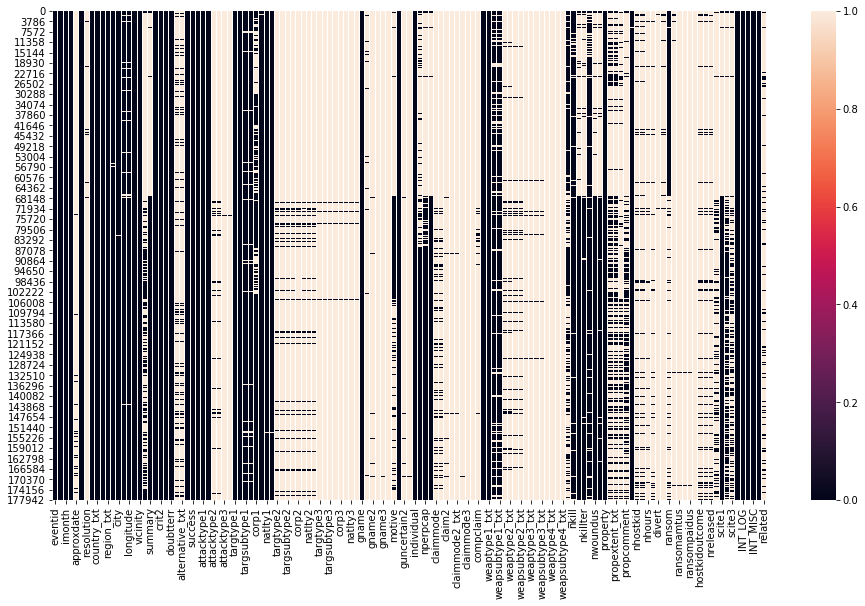

In [23]:
plt.figure(figsize = (16,9))
sns.heatmap(df.isnull())

In [24]:
#df2 = df1.fillna(df1.mean())
#df2

## US Terror Attacks and Death Injuries.

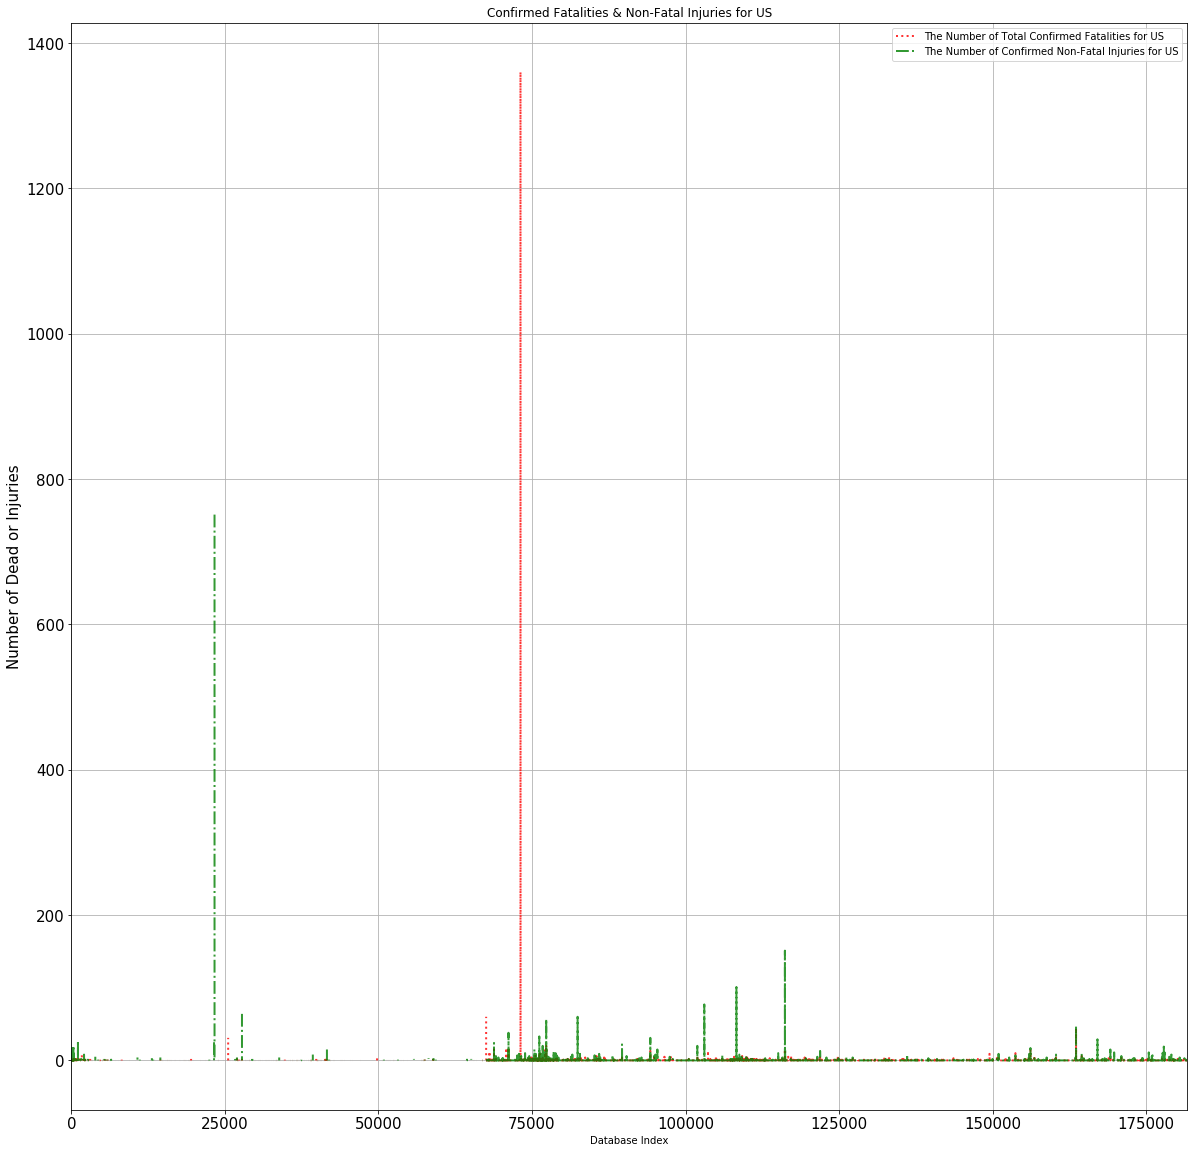

In [25]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

## Death and Injuries at all time.

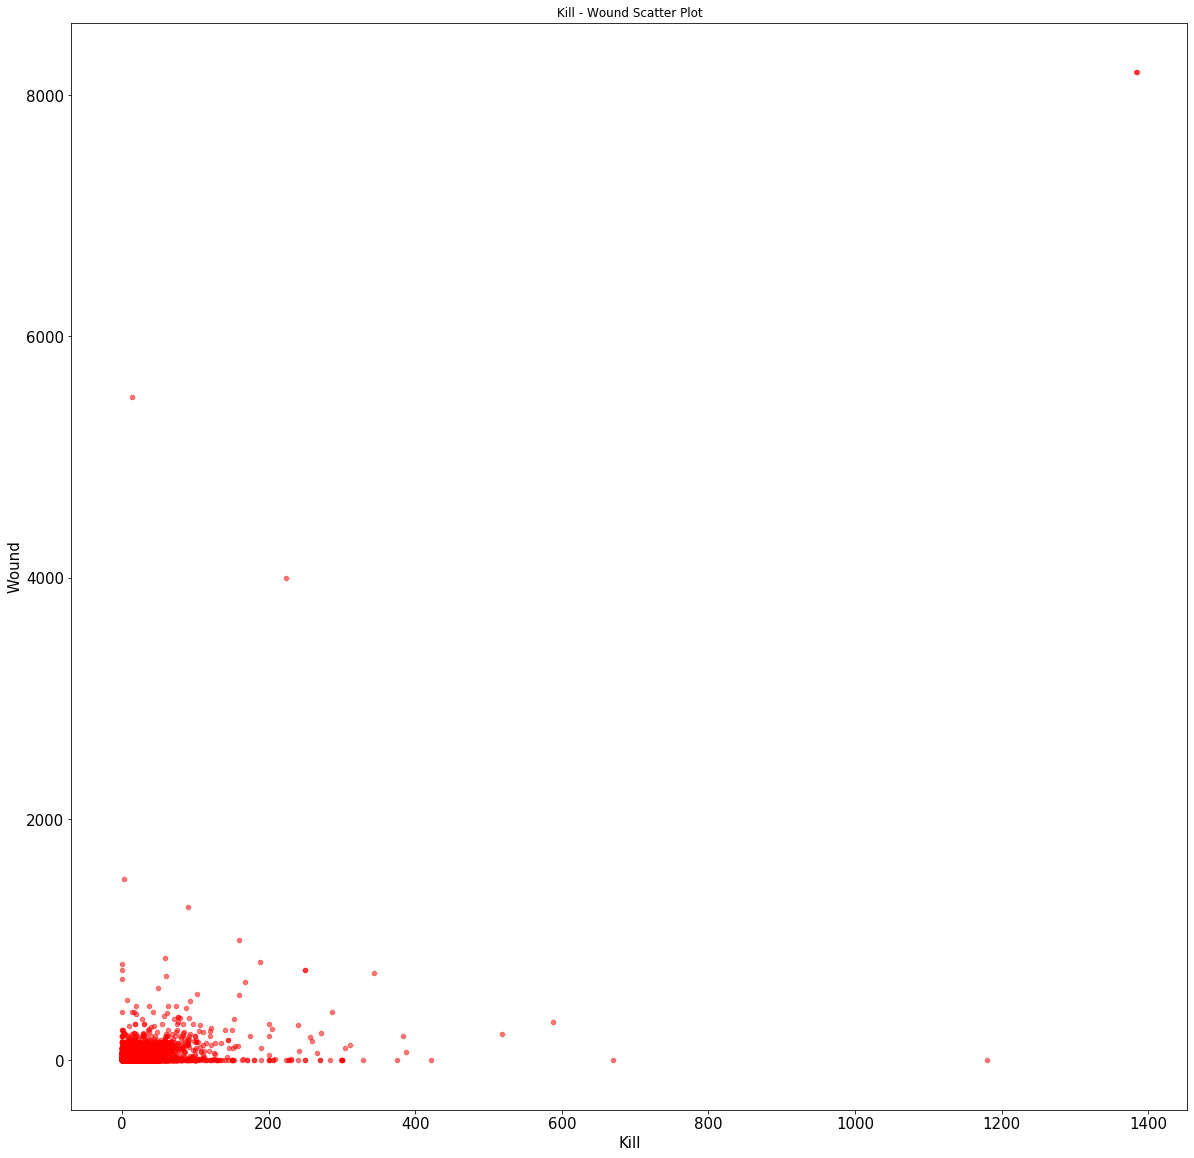

In [26]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

## Frequency of Terrorist Actions in Customized Region 

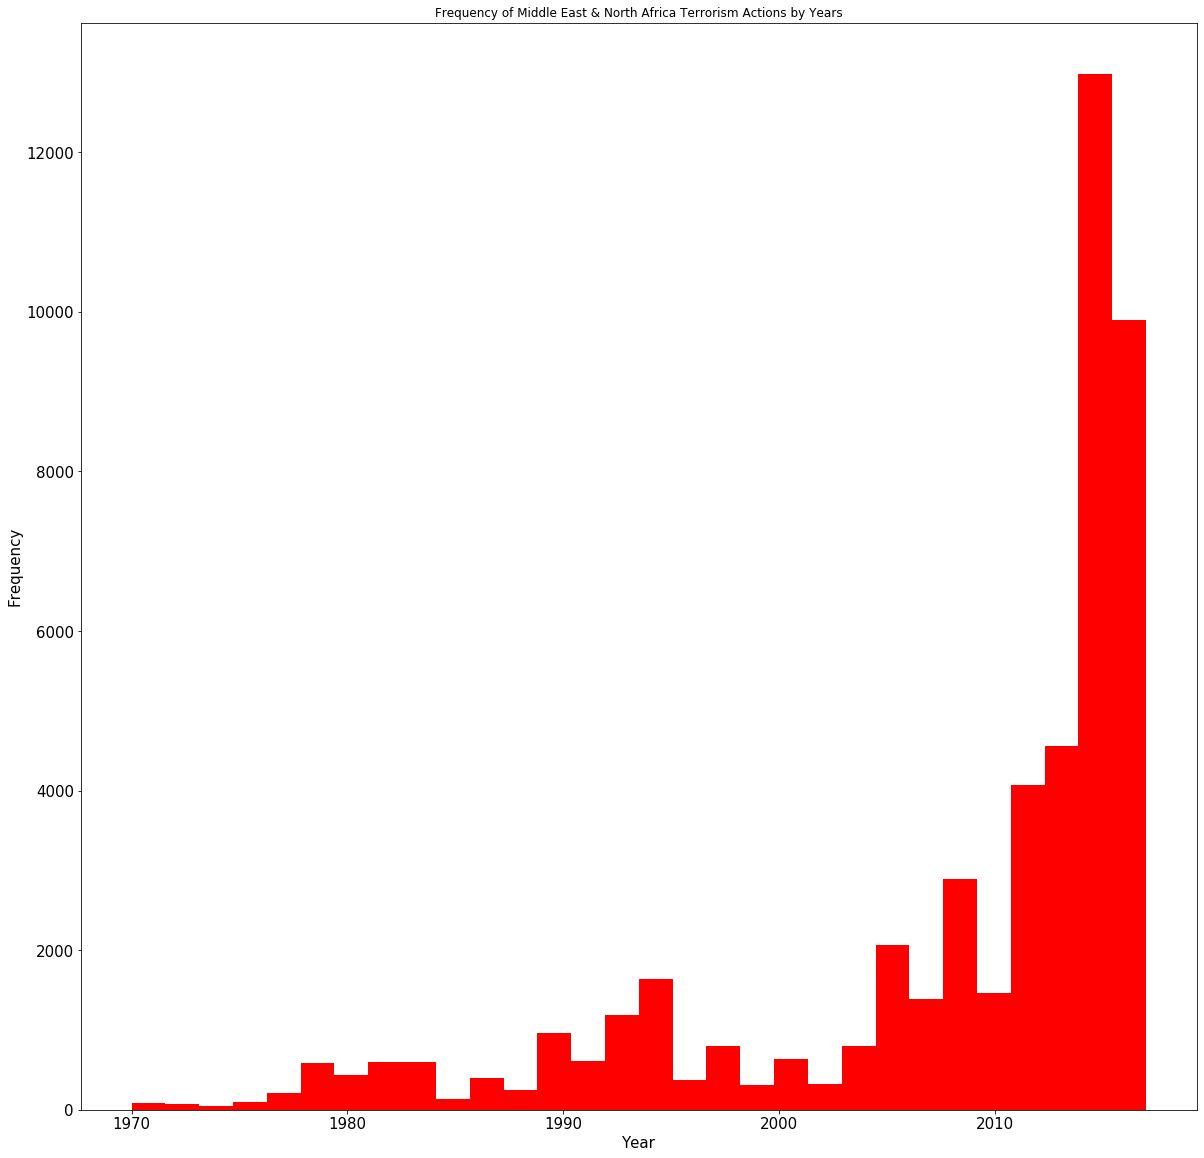

In [27]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

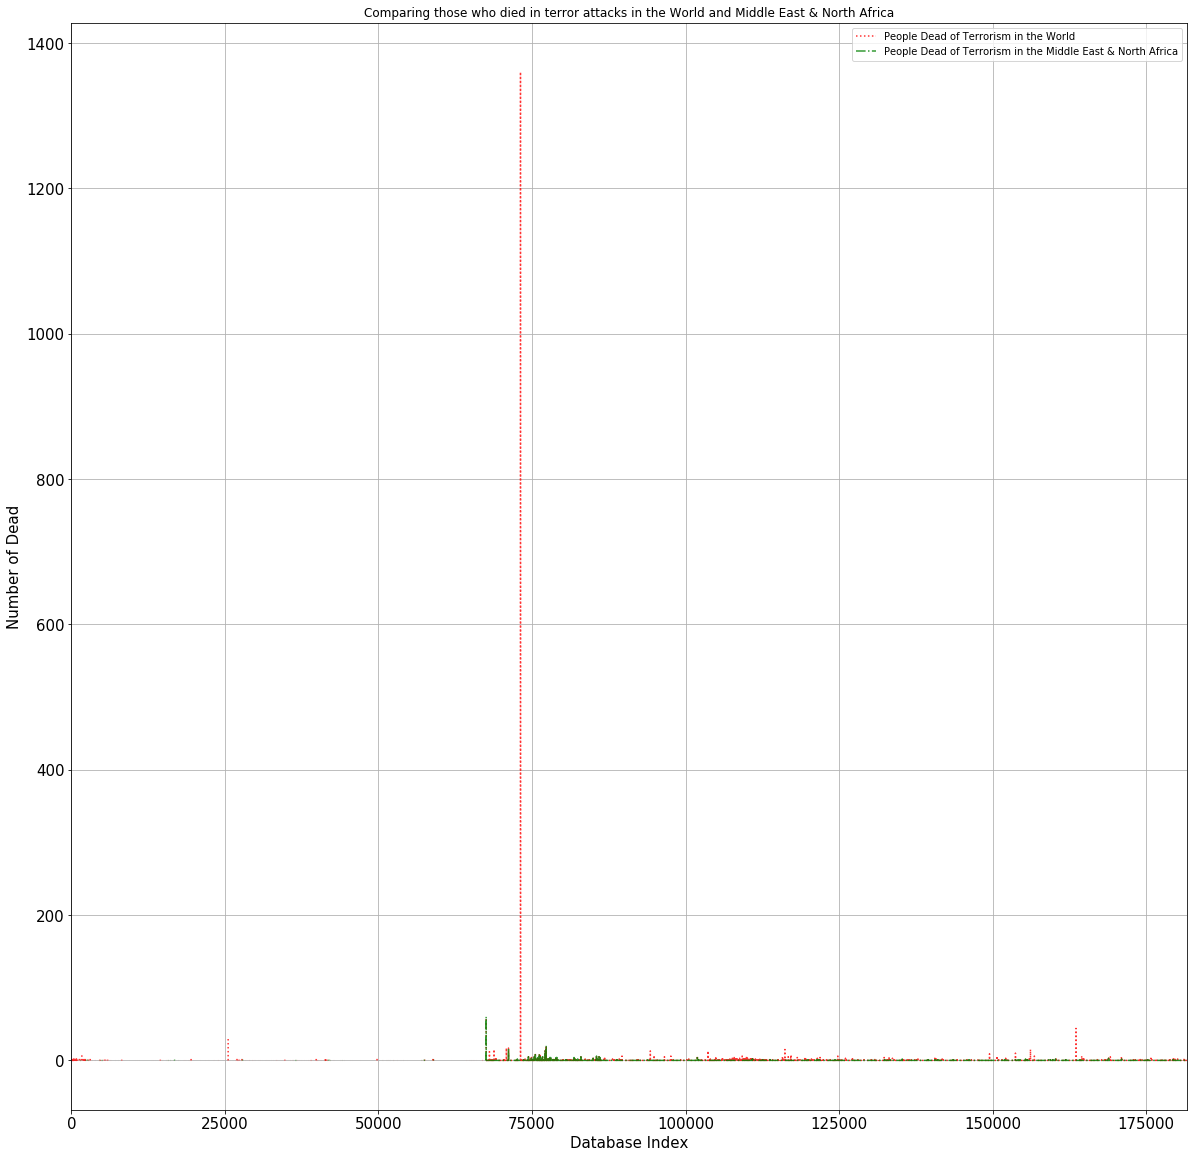

In [28]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

## Terrorist Attacks of a Particular year and their Locations.

In [29]:
filterYear = df['iyear'] == 1970

In [30]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList



In [31]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map



In [32]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [33]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [34]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt  Armed Assault  Assassination  Bombing/Explosion  \
nkill                 160297.0        24920.0           157321.0   

attacktype1_txt  Facility/Infrastructure Attack  Hijacking  \
nkill                                    3642.0     3718.0   

attacktype1_txt  Hostage Taking (Barricade Incident)  \
nkill                                         4478.0   

attacktype1_txt  Hostage Taking (Kidnapping)  Unarmed Assault  Unknown  
nkill                                24231.0            880.0  32381.0

In [35]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
Armed Assault                          1 non-null float64
Assassination                          1 non-null float64
Bombing/Explosion                      1 non-null float64
Facility/Infrastructure Attack         1 non-null float64
Hijacking                              1 non-null float64
Hostage Taking (Barricade Incident)    1 non-null float64
Hostage Taking (Kidnapping)            1 non-null float64
Unarmed Assault                        1 non-null float64
Unknown                                1 non-null float64
dtypes: float64(9)
memory usage: 80.0+ bytes


C:\Users\Satish Kumar Pal\anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


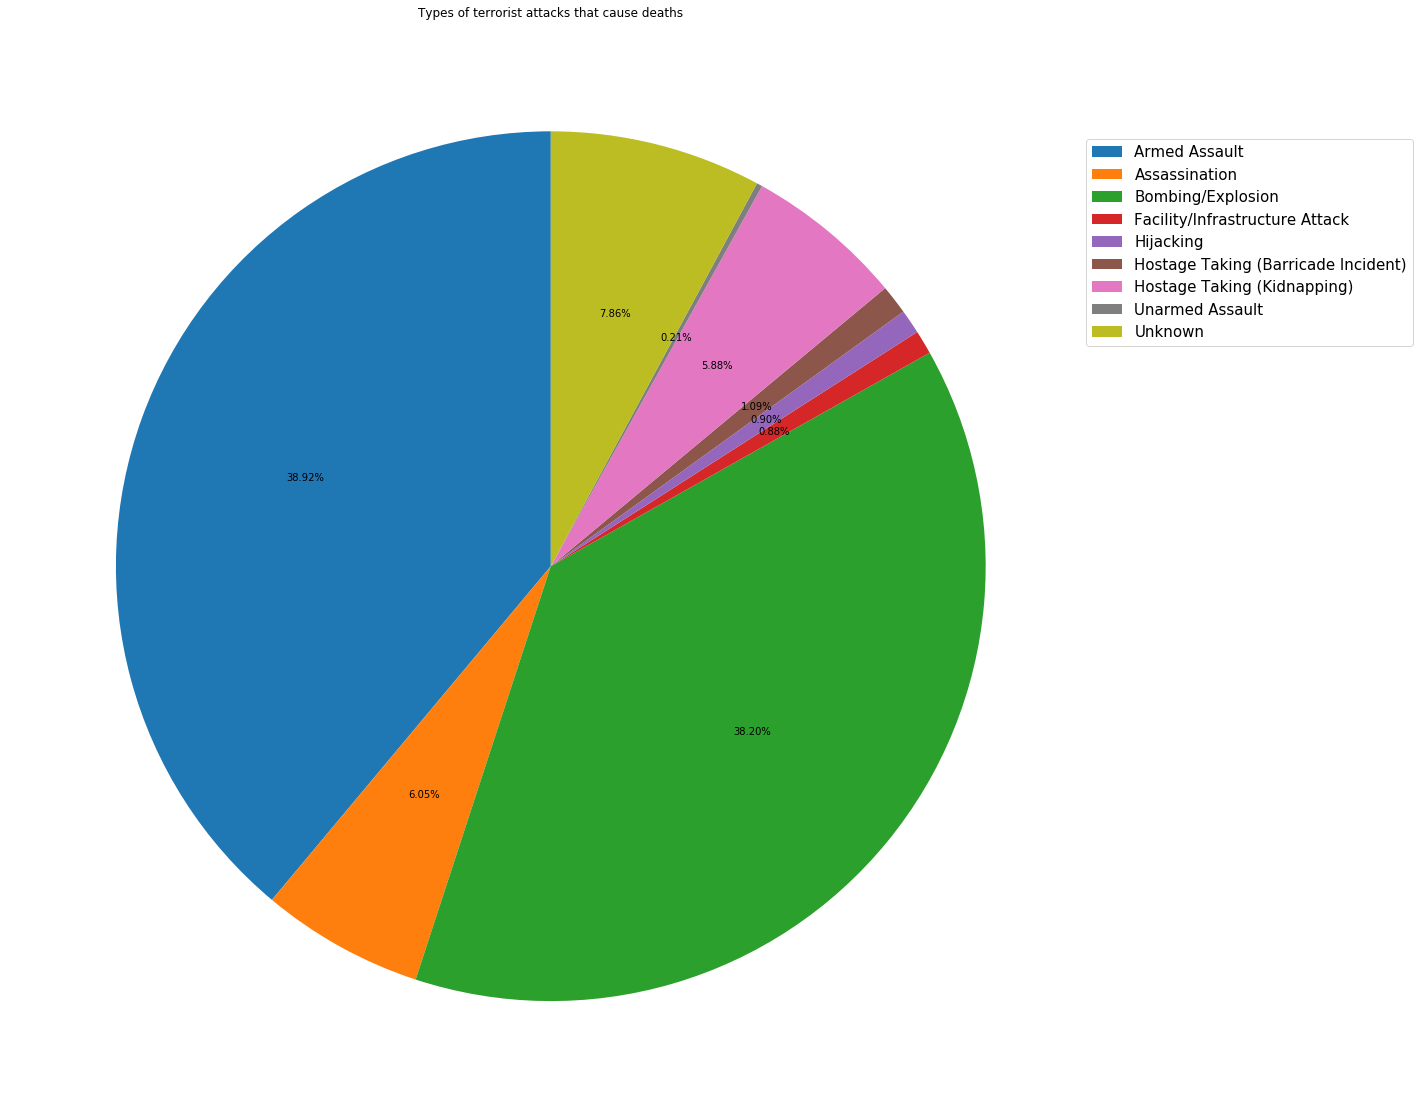

In [36]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

## Number of Killed in Terrorist Attacks by Countries

In [37]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [38]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData



country_txt  Afghanistan  Albania  Algeria  Andorra  Angola  \
nkill            39384.0     42.0  11066.0      0.0  3043.0   

country_txt  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
nkill                        0.0      490.0     37.0       23.0     30.0   

country_txt  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  \
nkill             258.0      1.0     44.0      1244.0      76.0     14.0   

country_txt  Belgium  Belize  Benin  Bhutan  Bolivia  Bosnia-Herzegovina  \
nkill           79.0     3.0    0.0     9.0     42.0                79.0   

country_txt  Botswana  Brazil  Brunei  Bulgaria  Burkina Faso  Burundi  \
nkill            11.0   203.0     0.0      28.0         134.0   4205.0   

country_txt  Cambodia  Cameroon  Canada  Central African Republic    Chad  \
nkill           543.0    2347.0   365.0                    1990.0  1119.0   

country_txt  Chile   China  Colombia  Comoros  Costa Rica  Croatia  Cuba  \
nkill        228.0  1008.0   14698.0      1.0        17.0    248.0   8.0   

country_txt  Cyprus  Czech Republic  Czechoslovakia  \
nkill          45.0             6.0            27.0   

country_txt  Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
nkill                                  4069.0      5.0     274.0       3.0   

country_txt  Dominican Republic  East Germany (GDR)  East Timor  Ecuador  \
nkill                      34.0                 2.0         9.0     54.0   

country_txt   Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia  \
nkill        3869.0      12053.0                2.0     46.0      3.0   

country_txt  Ethiopia  Falkland Islands  Fiji  Finland  France  French Guiana  \
nkill          1765.0               0.0   8.0     11.0   534.0            1.0   

country_txt  French Polynesia  Gabon  Gambia  Georgia  Germany  Ghana  Greece  \
nkill                     0.0    6.0    13.0    278.0     84.0   19.0   325.0   

country_txt  Grenada  Guadeloupe  Guatemala  Guinea  Guinea-Bissau  Guyana  \
nkill            9.0         8.0     5167.0   213.0           17.0    41.0   

country_txt  Haiti  Honduras  Hong Kong  Hungary  Iceland    India  Indonesia  \
nkill        336.0     307.0        4.0      6.0      0.0  19341.0     1238.0   

country_txt  International    Iran     Iraq  Ireland  Israel  Italy  \
nkill                  1.0  1673.0  78589.0    117.0  1703.0  420.0   

country_txt  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan   Kenya  Kosovo  \
nkill              268.0     42.0   66.0   133.0        39.0  1948.0    83.0   

country_txt  Kuwait  Kyrgyzstan  Laos  Latvia  Lebanon  Lesotho  Liberia  \
nkill          63.0        10.0  27.0     2.0   4061.0     46.0    177.0   

country_txt   Libya  Lithuania  Luxembourg  Macau  Macedonia  Madagascar  \
nkill        2598.0        1.0         0.0    1.0       49.0        31.0   

country_txt  Malawi  Malaysia  Maldives    Mali  Malta  Martinique  \
nkill          33.0     152.0      20.0  1432.0    5.0         0.0   

country_txt  Mauritania  Mauritius  Mexico  Moldova  Montenegro  Morocco  \
nkill              43.0        0.0   780.0     13.0         1.0    292.0   

country_txt  Mozambique  Myanmar  Namibia   Nepal  Netherlands  New Caledonia  \
nkill            2711.0   1280.0    220.0  1969.0         37.0           35.0   

country_txt  New Hebrides  New Zealand  Nicaragua   Niger  Nigeria  \
nkill                 0.0          1.0    10598.0  1474.0  22682.0   

country_txt  North Korea  North Yemen  Norway  Pakistan  Panama  \
nkill                3.0          3.0    79.0   23822.0    38.0   

country_txt  Papua New Guinea  Paraguay  People's Republic of the Congo  \
nkill                    79.0      59.0                            15.0   

country_txt     Peru  Philippines  Poland  Portugal  Qatar  \
nkill        12771.0       9559.0     9.0      32.0    7.0   

country_txt  Republic of the Congo  Rhodesia  Romania  Russia  Rwanda  \
nkill                        182.0     217.0      4

In [39]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

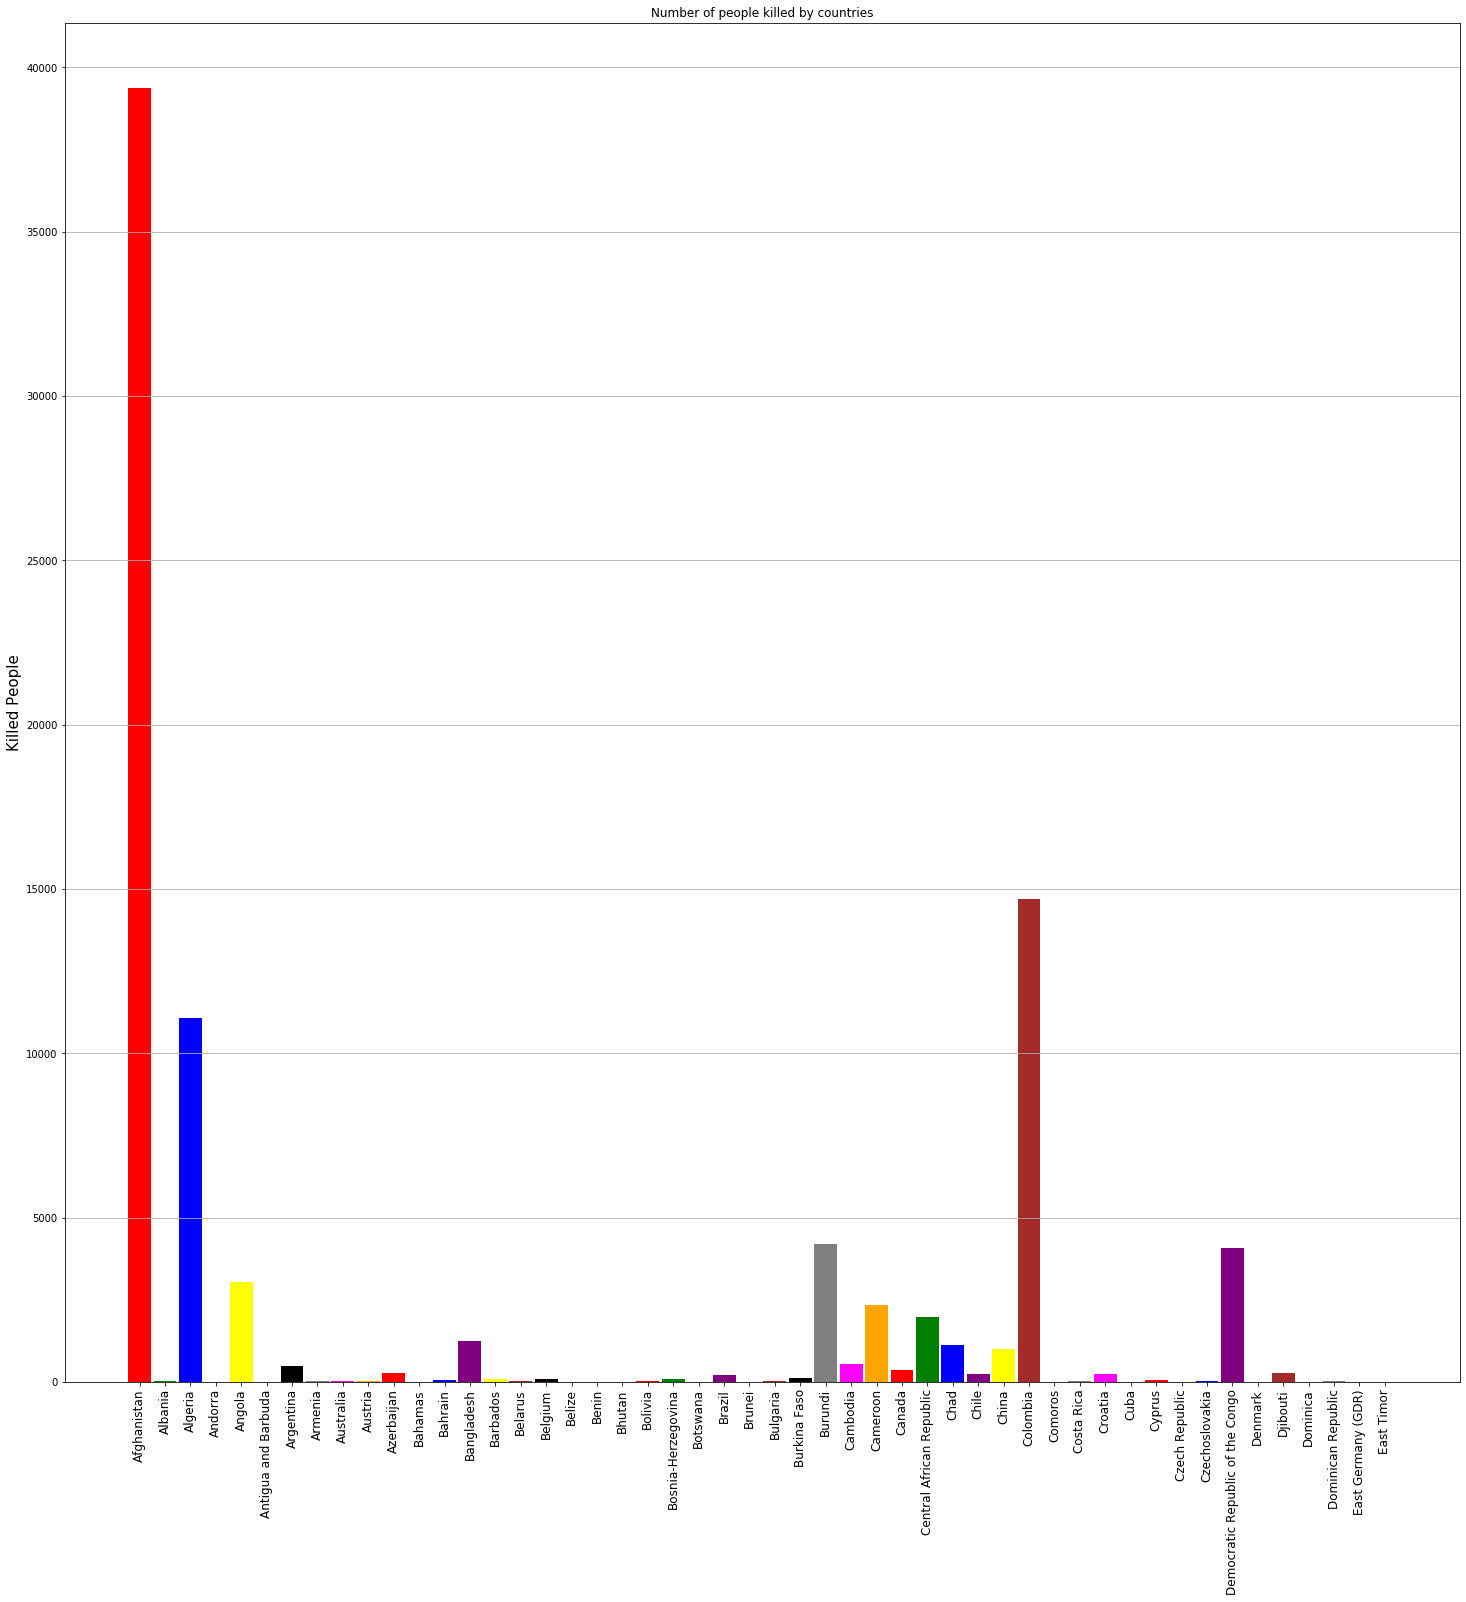

In [41]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()



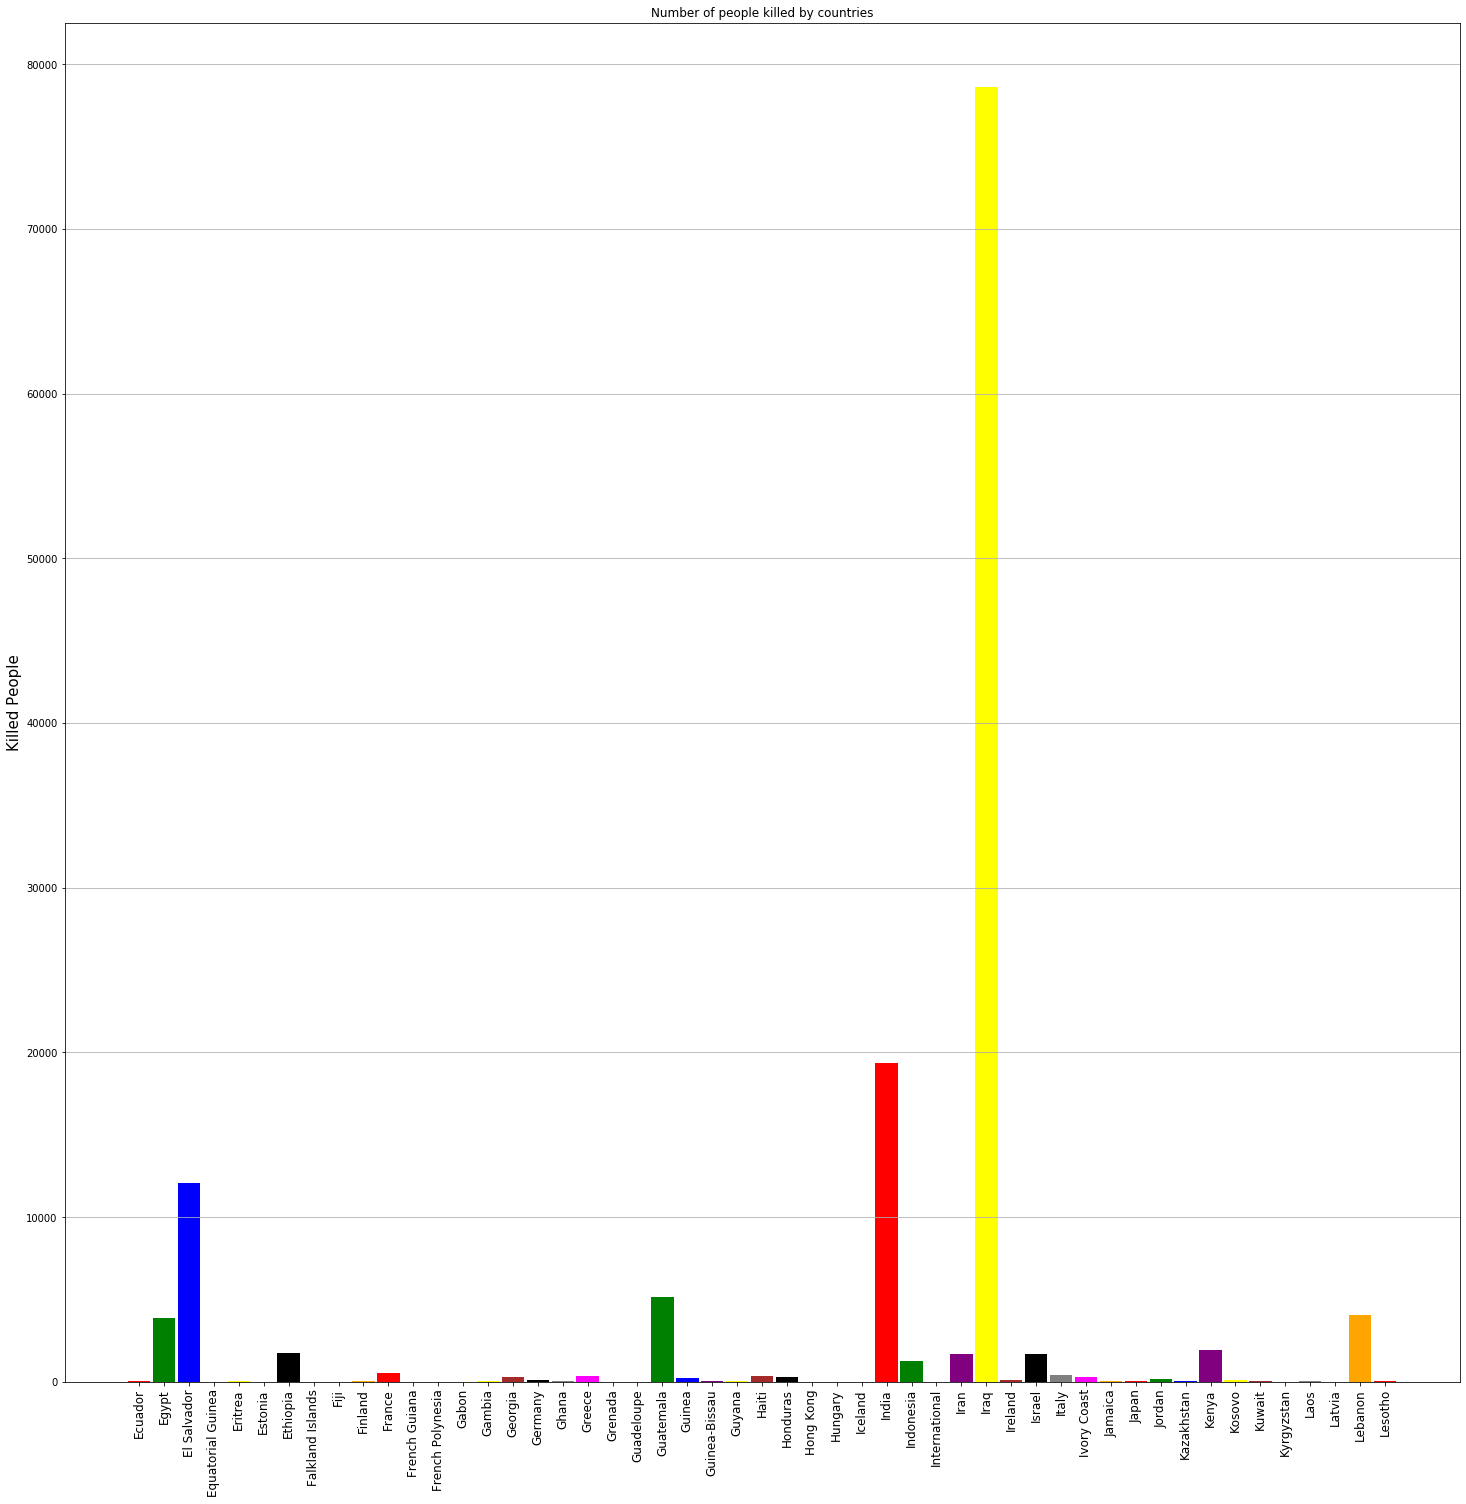

In [42]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

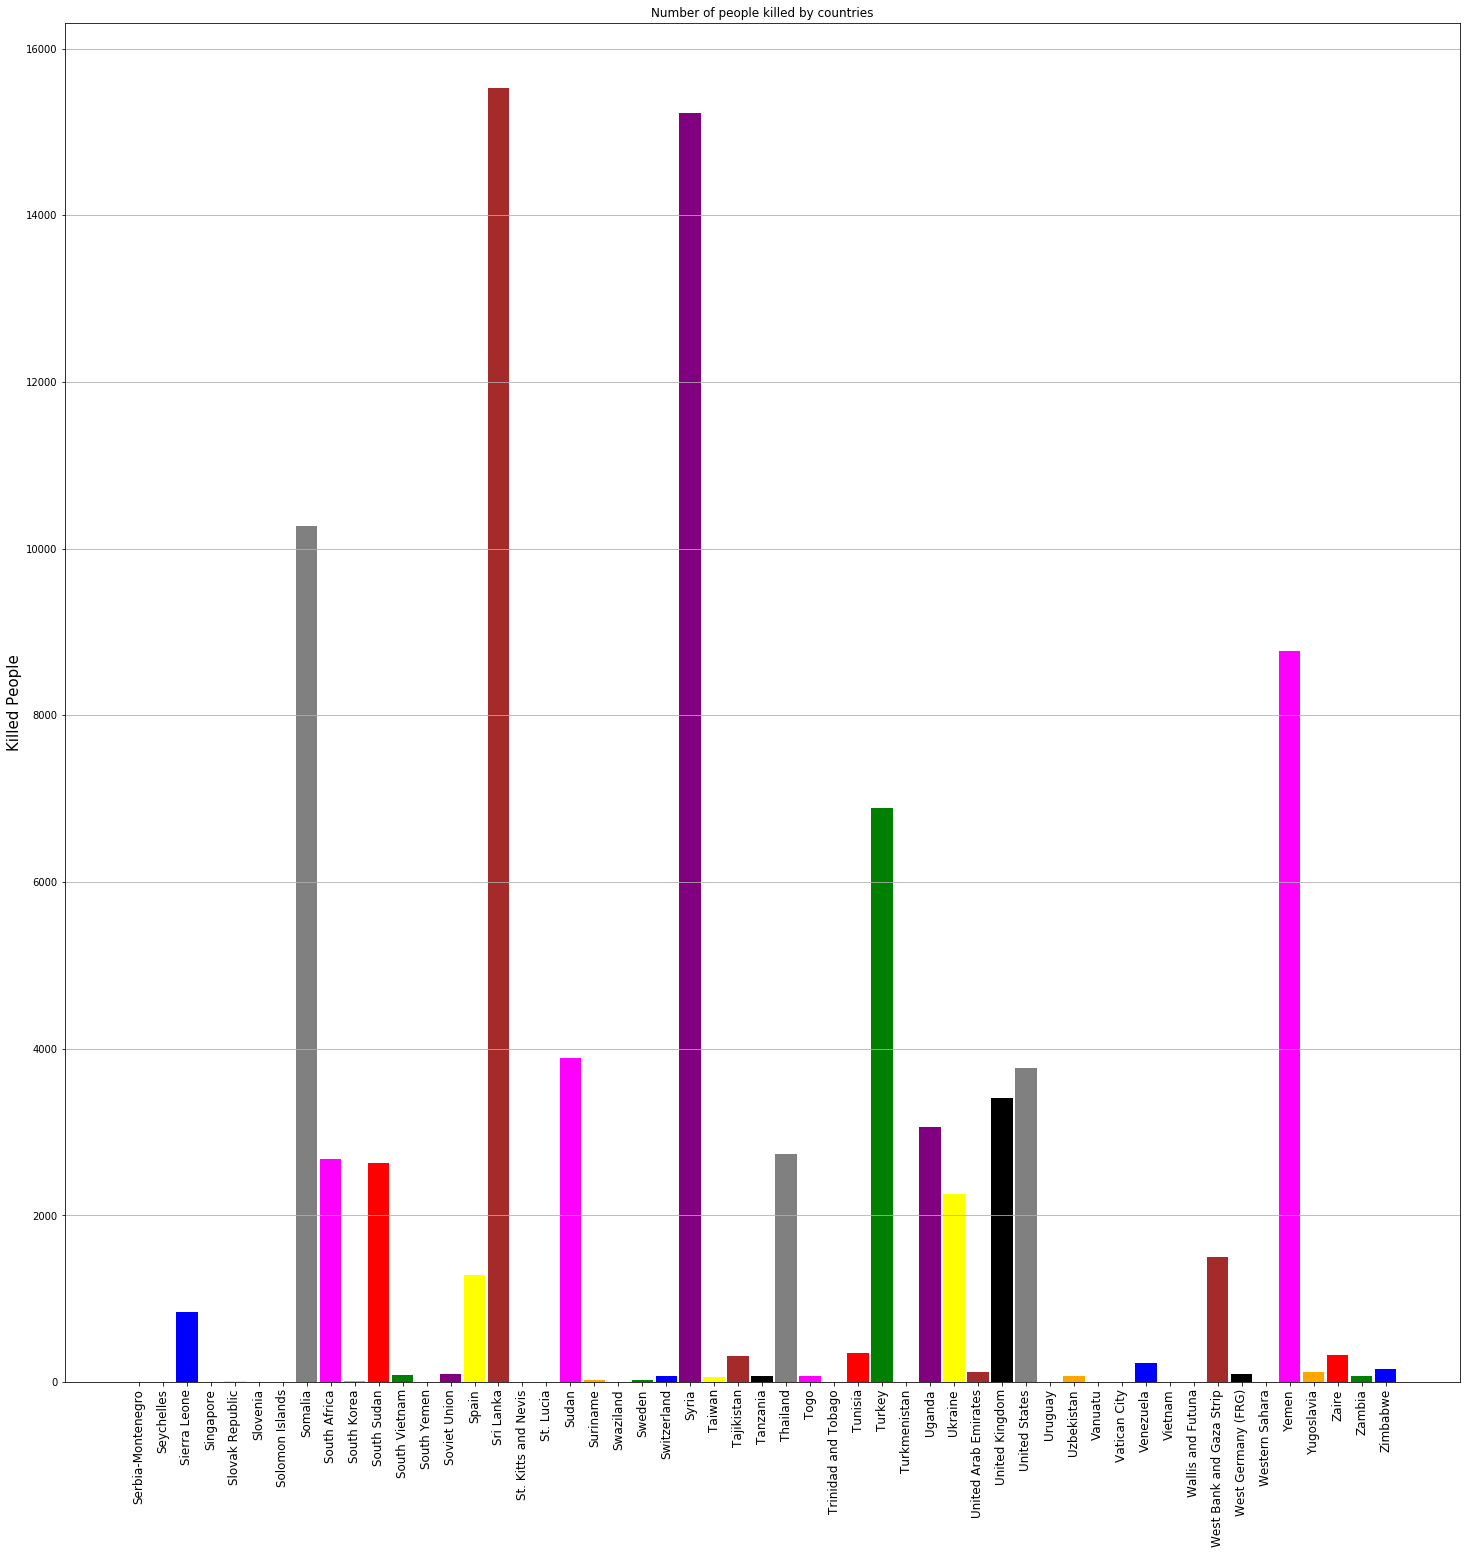

In [43]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()